# Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [5]:
Data = pd.read_csv('/content/Sales Dataset.csv')

Data.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Check for Missing Values

In [7]:
Data.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


# Handling Missing Values
POSTALCODE, STATE, TERRITORY, and ADDRESSLINE2 is replaced with 'Unknown' or 'Unavailable' as appropriate:


In [9]:
# Replace missing values in selected columns with 'Unknown'
columns_to_fill = ['POSTALCODE', 'STATE', 'TERRITORY', 'ADDRESSLINE2']

# Convert to string and fill missing values
for col in columns_to_fill:
    Data[col] = Data[col].fillna('Unknown').astype(str)
Data.isnull().sum


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [10]:
Data.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,Unknown,San Francisco,CA,Unknown,USA,Unknown,Brown,Julie,Medium


In [11]:
Data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      2823 non-null   object 


In [15]:
#Convert ORDERDATE Column to datetime datatype
Data['ORDERDATE'] = pd.to_datetime(Data['ORDERDATE'])

Data.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium


# Total Sales Over Time
Insight: Detect seasonality or trends in sales over months/quarters/years.
Business Use: Helps in demand forecasting and planning promotions.

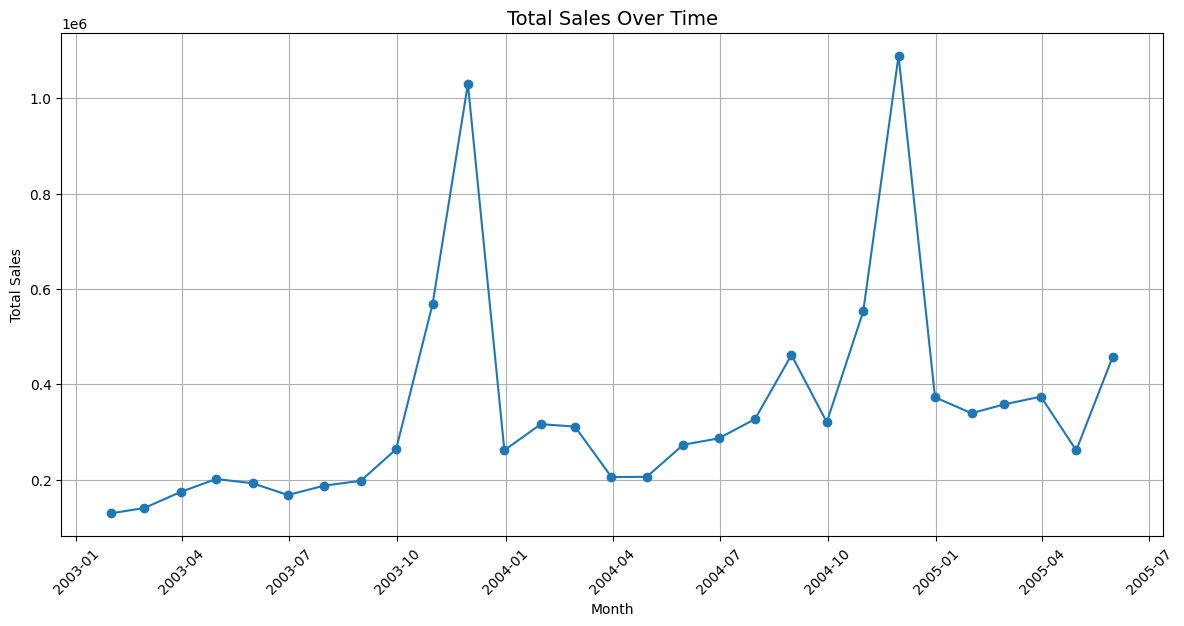

In [16]:
# Group sales by month
monthly_sales = Data.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['ORDERDATE'], monthly_sales['SALES'], marker='o', linestyle='-')
plt.title('Total Sales Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Sales by Product Line
Insight: Identify the best- and worst-performing product lines.
Business Use: Informs inventory decisions and marketing priorities.See which product lines generate the most revenue.
Spot underperforming lines that might need strategic decisions (e.g., discontinue, promote more).
Compare performance across product categories clearly.
Business Value:
Focus inventory stocking on high-performing lines.
Reevaluate or market low-performing products.
Align sales targets and promotions to product strength.

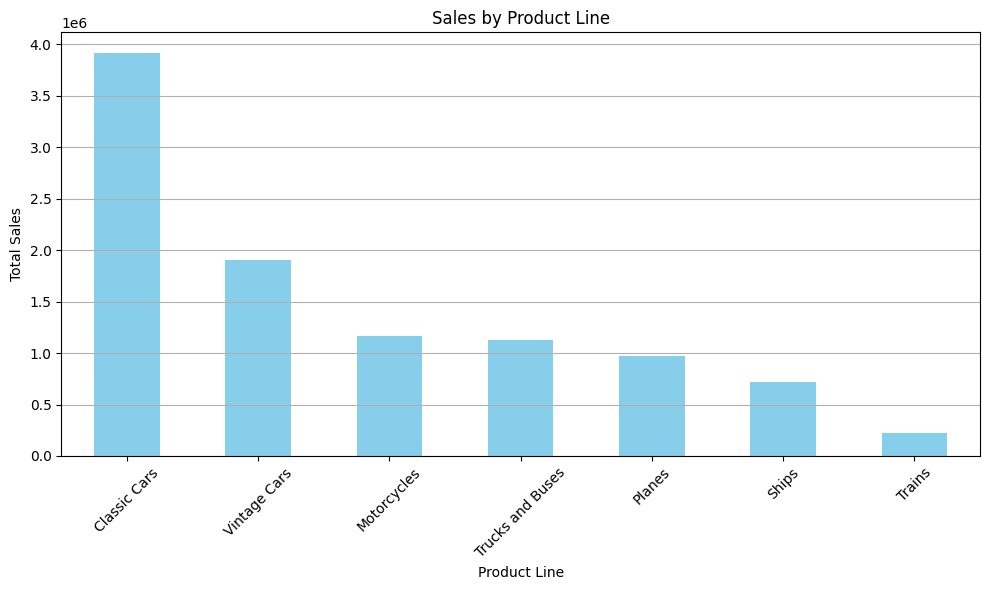

In [22]:
# Group sales by product line
product_sales = Data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

#Plotting
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color = 'skyblue')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Sales by Country or Territory
Insight: Spot strong/weak regions.
Business Use: Supports regional strategy and resource allocation.

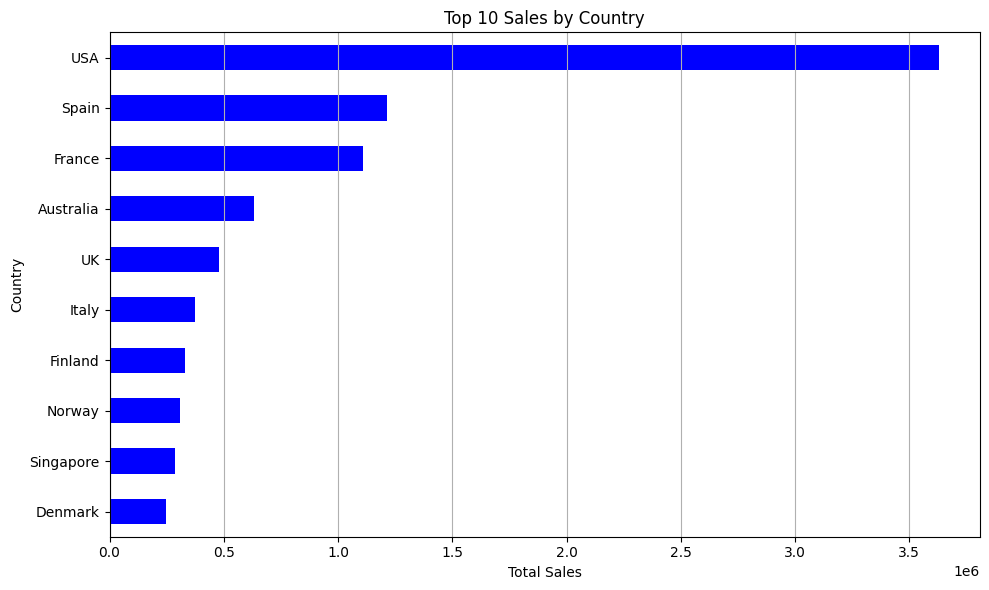

In [18]:
#Sales by Country or Territory
Sales_by_Country = Data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)

#Plotting
plt.figure(figsize=(10,6))
Sales_by_Country.plot(kind='barh', color = 'blue')
plt.title('Top 10 Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

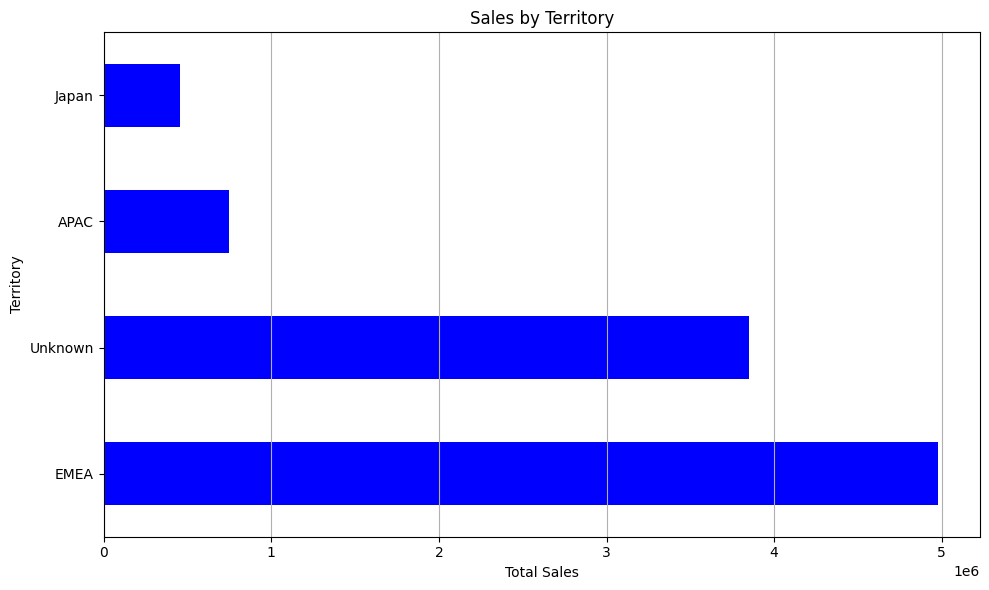

In [28]:
#Sales by Territory
Sales_by_Territory = Data.groupby('TERRITORY')['SALES'].sum().sort_values(ascending=False)

#Plotting
plt.figure(figsize=(10,6))
Sales_by_Territory.plot(kind='barh', color = 'blue')
plt.title('Sales by Territory')
plt.xlabel('Total Sales')
plt.ylabel('Territory')
plt.tight_layout()
plt.grid(axis='x')
plt.show

# Customer Segmentation by Deal Size
Insight: See which customer tier generates most revenue.
Business Use: Tailors customer retention and acquisition strategies.

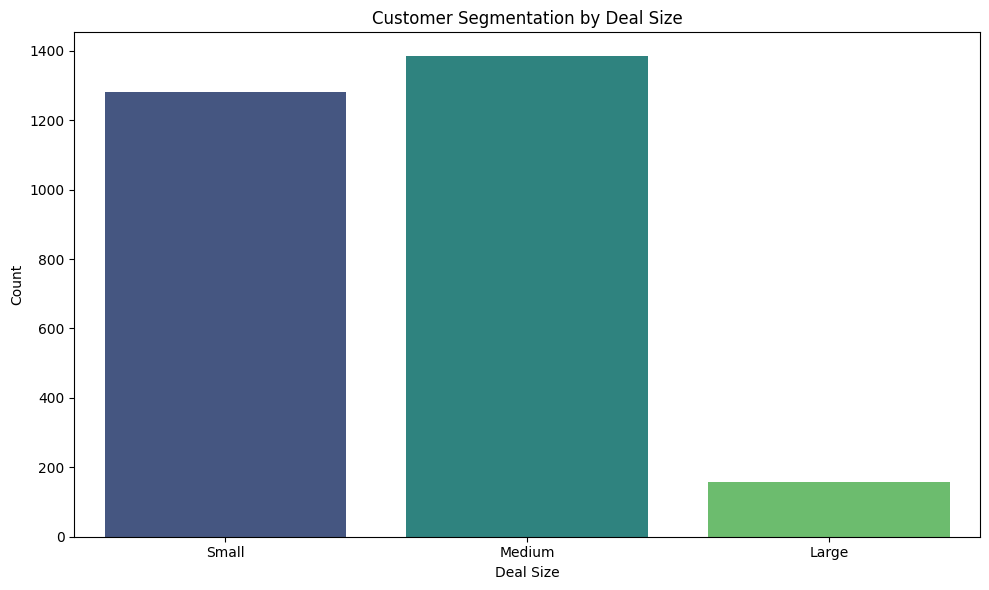

In [30]:
#Customer segmentation by deal size
deal_size_sales = Data.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)

#Plotting
plt.figure(figsize=(10,6))
sns.countplot(x='DEALSIZE', data=Data, palette='viridis')
plt.title('Customer Segmentation by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Top Customers by Sales
Insight: Identify high-value customers.
Business Use: Focus account management efforts and loyalty incentives.Business Value:
Enable targeted retention strategies (loyalty programs, discounts).
Prioritize customer relationship management.
Justify personalized service for top customers.



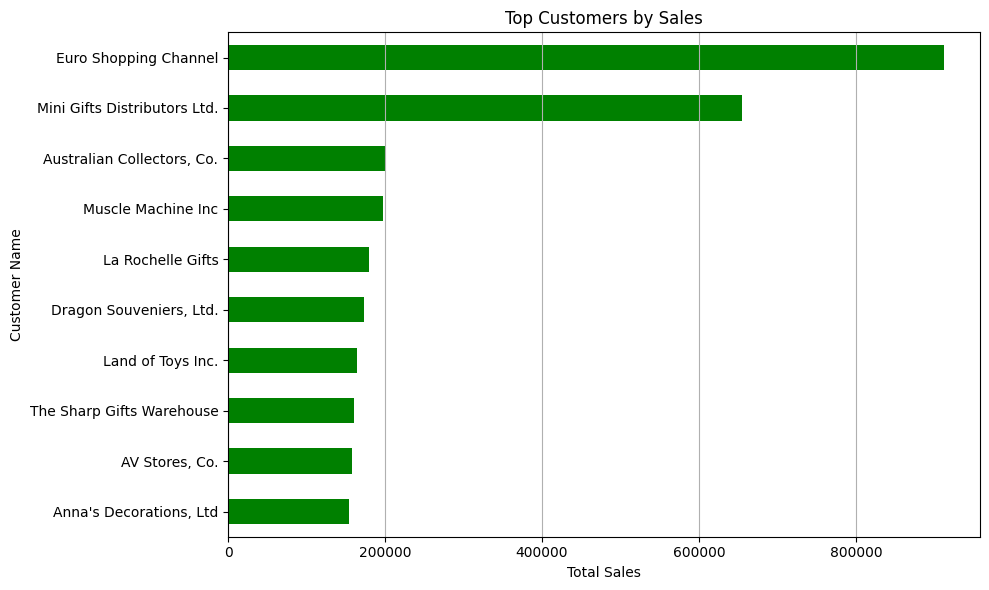

In [36]:
#Top Customers by Sale
Top_Customers = Data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

#Plotting
plt.figure(figsize=(10,6))
Top_Customers.plot(kind='barh', color = 'green')
plt.title('Top Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()



# Monthly or Quarterly Sales Trend
Insight: Observe cyclic patterns or identify months with slow performance,Spot seasonal spikes or slumps in sales,
Detect year-over-year growth or slowdown.

Business Use: Optimizes staffing, supply chain, and budgeting,forecast demand more accurately,adjust inventory and staffing based on peak and low months, and sets monthly sales targets and plans marketing efforts effectively.



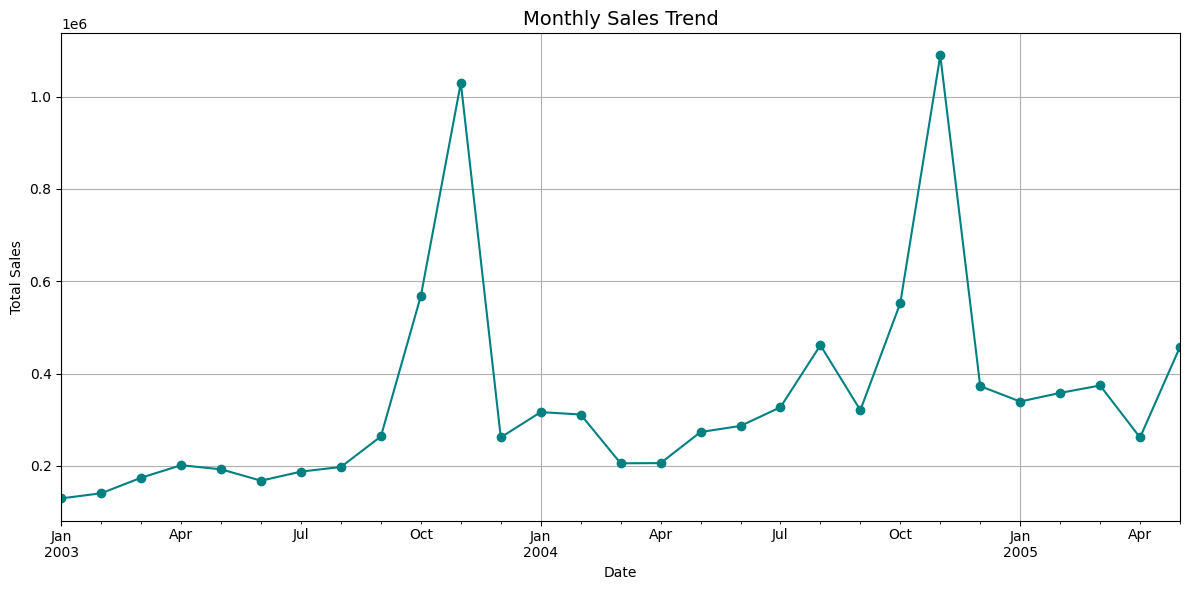

In [38]:
# Combine YEAR_ID and MONTH_ID into a datetime format
Data['YEAR_MONTH'] = pd.to_datetime(Data['YEAR_ID'].astype(str) + '-' + Data['MONTH_ID'].astype(str))

# Group sales by YEAR_MONTH
monthly_sales = Data.groupby('YEAR_MONTH')['SALES'].sum()

# Plotting the line chart
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Product Performance
Insight: Find fast- or slow-moving items.
Business Use: Supports stock management and product development.

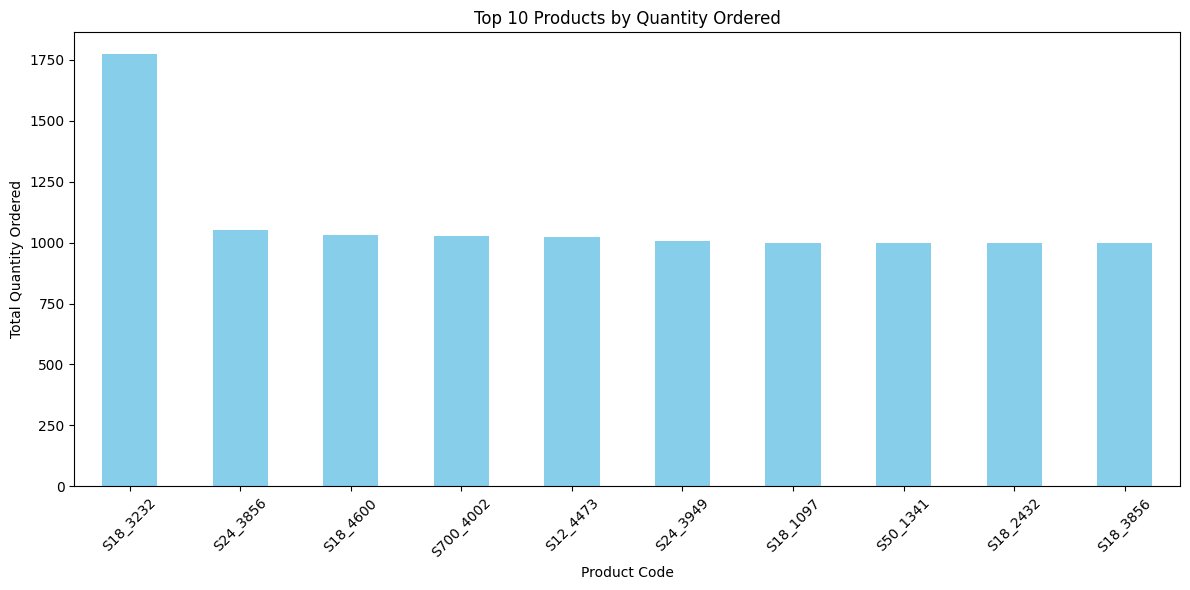

In [45]:
# Grouping by PRODUCTCODE to get total quantity ordered
product_performance = Data.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 performing products by quantity ordered
plt.figure(figsize=(12, 6))
product_performance.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Quantity Ordered')
plt.xlabel('Product Code')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 8. Sales by Status
Insight: Analyze fulfillment efficiency (e.g., how much revenue is stuck in ‘On Hold’).

Business Use: Improves operations and order processing.



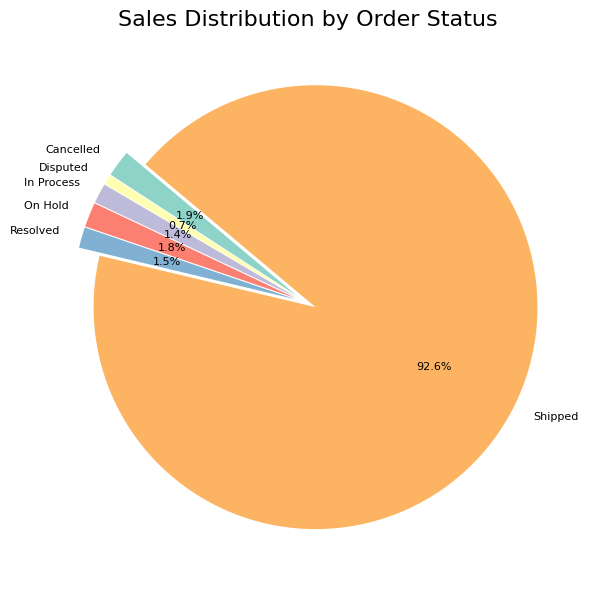

In [15]:
# Group data by STATUS and sum SALES
status_sales = Data.groupby('STATUS')['SALES'].sum()

# Explode the slices slightly for emphasis
explode = [0.05] * len(status_sales)

# Plot as a larger pie chart with better formatting
plt.figure(figsize=(6,6))
plt.pie(
    status_sales,
    labels=status_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    textprops={'fontsize': 8},
    colors=plt.cm.Set3.colors
)
plt.title('Sales Distribution by Order Status', fontsize=16)
plt.axis('equal')  # Ensures pie is circular
plt.tight_layout()
plt.show()
